In [644]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [645]:
url = 'https://drive.google.com/uc?id=17FVoLMgvnQSXhHXQsK8URL0SWrpUlpto'

data = pd.read_csv(url)
data.head(100)

,Date,Sales,Units,Stock,SKU,Retailer
0,2014-02-06,0.00,NaN,-0.0,SKU_126,RETAILER_5
1,2014-02-06,0.00,NaN,0.0,SKU_126,RETAILER_6
2,2014-02-06,0.00,NaN,0.0,SKU_126,RETAILER_7
3,2014-02-06,0.00,NaN,0.0,SKU_126,RETAILER_8
4,2014-02-06,0.00,NaN,0.0,SKU_127,RETAILER_0
5,2014-02-06,0.37,0.0,4.0,SKU_127,RETAILER_5
6,2014-02-06,0.00,NaN,0.0,SKU_127,RETAILER_6
7,2014-02-06,0.00,NaN,0.0,SKU_127,RETAILER_8
8,2014-02-06,0.00,NaN,0.0,SKU_128,RETAILER_6
9,2014-02-06,0.00,NaN,0.0,SKU_128,RETAILER_7


In [646]:
data[data['Sales'] < 0]

,Date,Sales,Units,Stock,SKU,Retailer
21,2014-02-06,-12.36,-1.0,1.0,SKU_14,RETAILER_6
114,2014-02-06,-0.58,-0.0,1.0,SKU_52,RETAILER_5
127,2014-02-06,-5.75,-0.0,1.0,SKU_51,RETAILER_6
134,2014-02-06,-0.29,-0.0,251.0,SKU_51,RETAILER_4
136,2014-02-06,-6.06,-0.0,2.0,SKU_51,RETAILER_6
...,...,...,...,...,...,...
114133,2017-10-19,-2.99,-0.0,1.0,SKU_122,RETAILER_4
114167,2017-10-19,-9.67,-0.0,42.0,SKU_43,RETAILER_1
114169,2017-10-19,-8.78,0.0,63.0,SKU_43,RETAILER_3
114190,2017-10-19,-3.04,-0.0,40.0,SKU_31,RETAILER_5


The fact that we have negative Sales and Units is strange but I will leave it due to the fact that negative Sales could mean amortization fees for an item and/or purchase of this item (in case if we have negative Units -> we buy instead of selling).

No need to drop NA values as for prediction we will use the sum of all sales. Thus, we make a dataframe which is grouped by the weeks.

<AxesSubplot:xlabel='Date'>

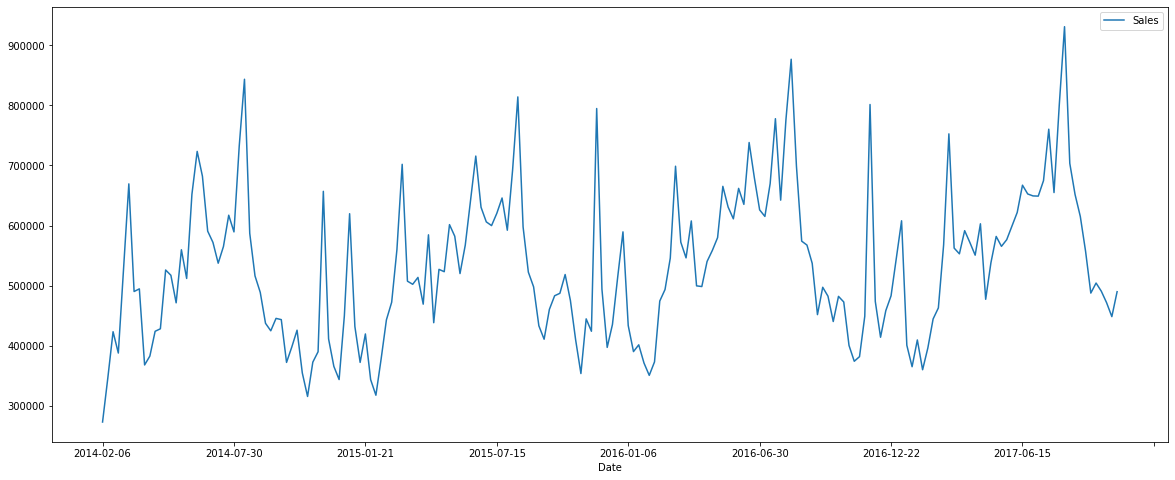

In [647]:
sales_per_week = data.groupby('Date').agg({'Sales': 'sum'}).reset_index()
sales_per_week.plot(x="Date", y="Sales", figsize=(20,8))

We see clear seasonality, sales are rising when the summer approaches. Moreover, data is Non-Stationary.

In [648]:
sales_per_week = sales_per_week.set_index('Date')

## Data Preparation

### Split the dataset

We will use a casual split - 80% of the dataset for training purposes and 20% for testing.

In [660]:
train_size = int(len(sales_per_week)*0.8)
train_data = sales_per_week.iloc[:train_size]
test_data = sales_per_week.iloc[train_size:]

### Normalize the dataset (to get rid of non-stationarity)

In [661]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [662]:
def create_datasets(data, window=10):
    X, y = [], []
    
    for i in range (len(data)-window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

In [663]:
WINDOW = 16 

X_train, y_train = create_datasets(train_scaled, WINDOW)
X_test, y_test = create_datasets(test_scaled, WINDOW)

I tried many windows sizes, but 16 looks optimal here. In case we hava a bigger dataset - it is better to use a bigger window.

## Create GRU model

### Building a model and finding best parameters

In [653]:
def find_best_parameters(X_train, y_train, X_test, y_test):
    model_result = []
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        min_delta = 0.001,
        patience = 30,
        restore_best_weights = True)
    
    for i in range(2, 225, 2):
        model = tf.keras.Sequential([
            tf.keras.layers.GRU(2*i, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
            tf.keras.layers.GRU(i, activation='tanh', dropout=0.2),
            tf.keras.layers.Dense(1)
        ])
        
        model.compile(optimizer='adam', loss='mse')
        
        history = model.fit(X_train, y_train, batch_size=4, validation_split=0.3, callbacks=[early_stopping], epochs=200, verbose=1)
        
        prediction = model.predict(X_test)
        
        Accuracy = []
        for j in range(prediction.shape[0]):
            error = abs(prediction[j] - y_test[j])
            Accuracy.append(float(1 - error))
        
        model_result.append({"units": i,
                           "Accuracy": sum(Accuracy)/len(Accuracy)})
    return model_result
        


For evaluation of my model I will use the next error and accuracy: Error = 100% * abs(predicted_values - y_test) -> Accuracy = 100% - Error

I don't recomend running the block below as it would probably take up to 25 mins to run.


In [267]:
model_result = find_best_parameters(X_train, y_train, X_test, y_test)

Epoch 1/200
25/25 [==============================] - 4s 35ms/step - loss: 0.2894 - val_loss: 0.3151
Epoch 2/200
25/25 [==============================] - 0s 9ms/step - loss: 0.1554 - val_loss: 0.1989
Epoch 3/200
25/25 [==============================] - 0s 9ms/step - loss: 0.1076 - val_loss: 0.1212
Epoch 4/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0650 - val_loss: 0.0768
Epoch 5/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0446 - val_loss: 0.0597
Epoch 6/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0381 - val_loss: 0.0525
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0444 - val_loss: 0.0534
Epoch 8/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0364 - val_loss: 0.0553
Epoch 9/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0520 - val_loss: 0.0529
Epoch 10/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0423 - val_loss: 0.0531
Epoch 11

In [654]:
model_result

[{'units': 2, 'Accuracy': 0.9067542313759934},
 {'units': 4, 'Accuracy': 0.9148718470463989},
 {'units': 6, 'Accuracy': 0.9123050409074144},
 {'units': 8, 'Accuracy': 0.9110465157454521},
 {'units': 10, 'Accuracy': 0.9099801562565917},
 {'units': 12, 'Accuracy': 0.9243174553331273},
 {'units': 14, 'Accuracy': 0.9114345549404714},
 {'units': 16, 'Accuracy': 0.9326666736486335},
 {'units': 18, 'Accuracy': 0.9088542362980333},
 {'units': 20, 'Accuracy': 0.9075590633179237},
 {'units': 22, 'Accuracy': 0.9069429596058576},
 {'units': 24, 'Accuracy': 0.9384075046467772},
 {'units': 26, 'Accuracy': 0.9315789135724518},
 {'units': 28, 'Accuracy': 0.919967394919909},
 {'units': 30, 'Accuracy': 0.9077018332869516},
 {'units': 32, 'Accuracy': 0.9077333252714435},
 {'units': 34, 'Accuracy': 0.926296770684507},
 {'units': 36, 'Accuracy': 0.9196045295879887},
 {'units': 38, 'Accuracy': 0.9077966279957012},
 {'units': 40, 'Accuracy': 0.9157350148575311},
 {'units': 42, 'Accuracy': 0.904616279869144},

Number of units doesn't have a significant effect on the accuracy of our model. I have also tried different: depth of my model, validation_split, dropout level for different layers, batch_size. The conclusion I got, that our top accuracy is around 93-94% and for better performance - I should make a WINDOW bigger, but in this case I would need much more data. However, 94% is more than enough to see the trend and approximate sales amount for each week.

### Buliding the final model with found parameters

Playing with some other parameters and layers (LSTM, Bidirectional LSTM & GRU) manually I came up with the next model

In [674]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.GRU(64, activation='tanh', dropout=0.2),
    tf.keras.layers.Dense(1)
    
])

In [675]:
model.compile(optimizer='adam', loss='mse')

In [676]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 40,
    restore_best_weights = True
)

history = model.fit(X_train, y_train, batch_size=6, validation_split=0.3, callbacks=[early_stopping], epochs=300, verbose=2)

Epoch 1/300
17/17 - 4s - loss: 0.0568 - val_loss: 0.0471
Epoch 2/300
17/17 - 0s - loss: 0.0311 - val_loss: 0.0311
Epoch 3/300
17/17 - 0s - loss: 0.0289 - val_loss: 0.0320
Epoch 4/300
17/17 - 0s - loss: 0.0269 - val_loss: 0.0279
Epoch 5/300
17/17 - 0s - loss: 0.0279 - val_loss: 0.0276
Epoch 6/300
17/17 - 0s - loss: 0.0277 - val_loss: 0.0271
Epoch 7/300
17/17 - 0s - loss: 0.0298 - val_loss: 0.0402
Epoch 8/300
17/17 - 0s - loss: 0.0288 - val_loss: 0.0287
Epoch 9/300
17/17 - 0s - loss: 0.0303 - val_loss: 0.0262
Epoch 10/300
17/17 - 0s - loss: 0.0237 - val_loss: 0.0292
Epoch 11/300
17/17 - 0s - loss: 0.0253 - val_loss: 0.0257
Epoch 12/300
17/17 - 0s - loss: 0.0235 - val_loss: 0.0260
Epoch 13/300
17/17 - 0s - loss: 0.0245 - val_loss: 0.0269
Epoch 14/300
17/17 - 0s - loss: 0.0240 - val_loss: 0.0251
Epoch 15/300
17/17 - 0s - loss: 0.0241 - val_loss: 0.0247
Epoch 16/300
17/17 - 0s - loss: 0.0249 - val_loss: 0.0303
Epoch 17/300
17/17 - 0s - loss: 0.0253 - val_loss: 0.0277
Epoch 18/300
17/17 - 0s

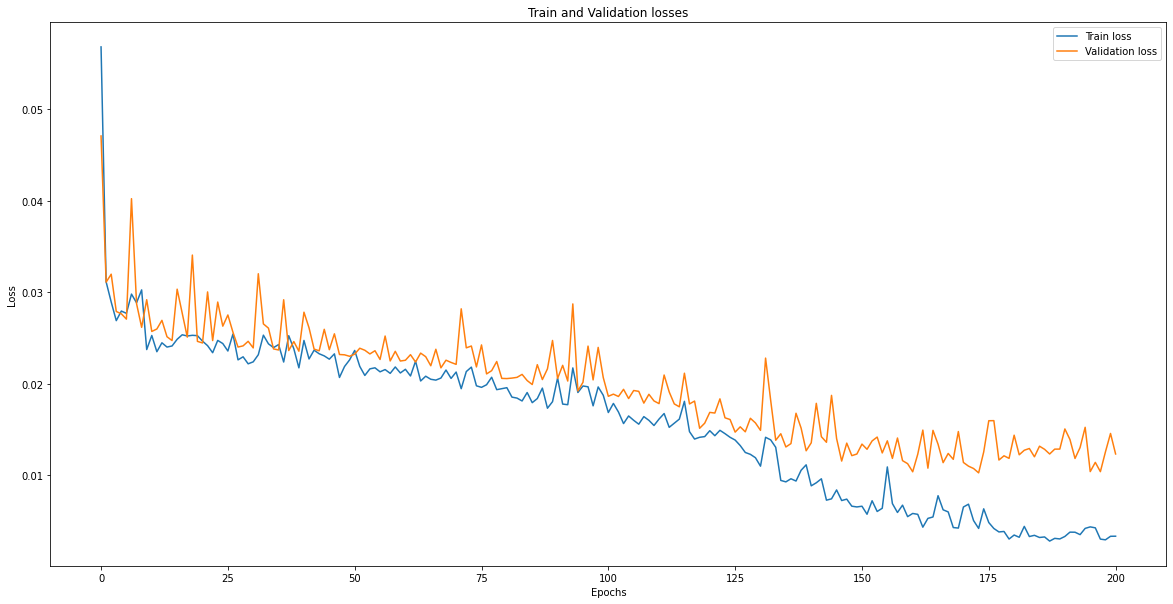

In [677]:
plt.figure(figsize = (20, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and Validation losses')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train loss', 'Validation loss'], loc='upper right')

In [678]:
prediction = model.predict(X_test)
Accuracy = []
for i in range(prediction.shape[0]):
    error = abs(prediction[i] - y_test[i])
    Accuracy.append(float(1 - error))

#The accuracy of the model     
print("The accuracy of the model is",  sum(Accuracy)/len(Accuracy))

The accuracy of the model is 0.928853171007842


Text(0, 0.5, 'Sales')

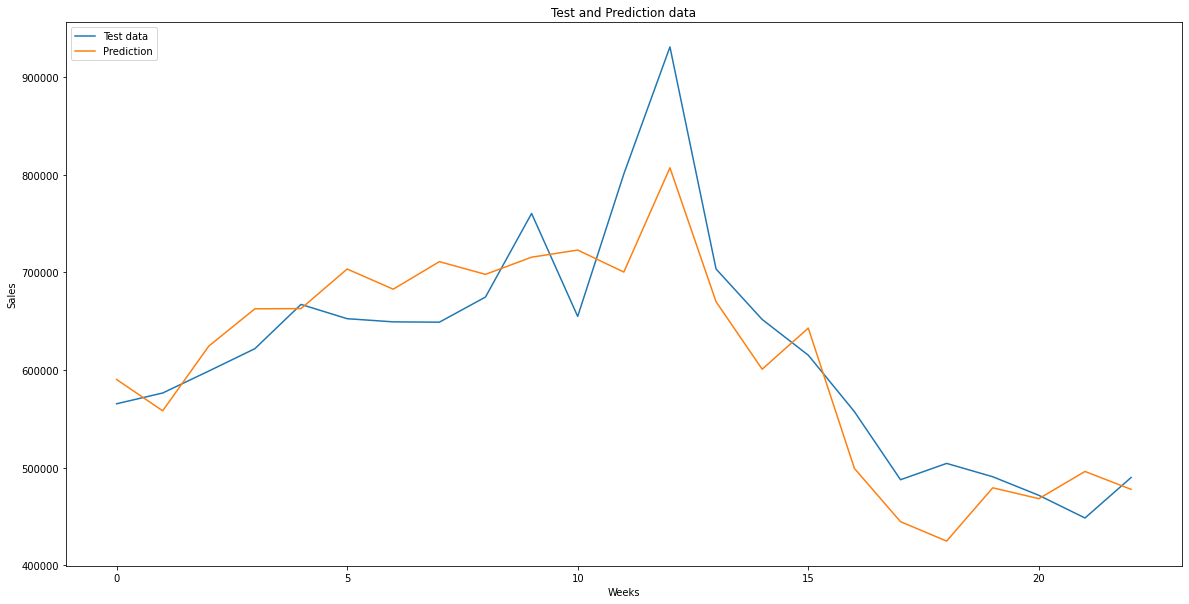

In [679]:
prediction = scaler.inverse_transform(prediction)
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

plt.figure(figsize=(20, 10))
plot_range = len(prediction)
plt.plot(np.arange(plot_range), np.array(y_test), label='Test data')
plt.plot(np.arange(plot_range), np.array(prediction),label='Prediction')
plt.title('Test and Prediction data')
plt.legend(loc='upper left')
plt.xlabel('Weeks')
plt.ylabel("Sales")

## Forecasting of the next 6 month

The best solution I came up with is predicting 1 week, using some window of weeks before -> append this week to the dataset -> predict the next week using updated data 

In [680]:
def predict_sales(data, weeks=24, model=model, window=16):
    scaled_data = scaler.transform(data)
    for i in range(weeks):
        X = scaled_data[-window:].reshape(1, 16, 1)
        predicted_value = model.predict(X) 
        scaled_data = np.append(scaled_data, predicted_value)
    old_data = scaler.inverse_transform(scaled_data[:-weeks].reshape(scaled_data[:-weeks].shape[0], 1))
    predicted = scaler.inverse_transform(scaled_data[-weeks:].reshape(scaled_data[-weeks:].shape[0], 1))
    
    return old_data, predicted    

In [681]:
old_data, prediction = predict_sales(sales_per_week, window=WINDOW)

Text(0, 0.5, 'Sales amount')

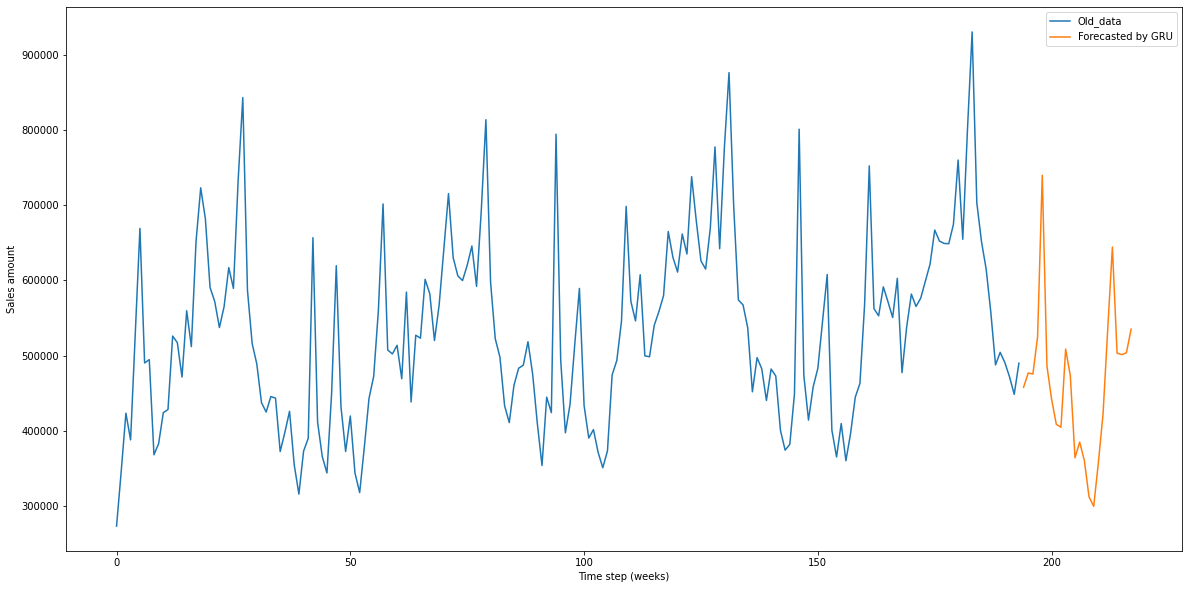

In [682]:
plt.figure(figsize=(20, 10)) 
range_history = len(old_data)
range_future = list(range(range_history, range_history +
                        len(prediction)))
plt.plot(np.arange(range_history), old_data, 
             label='Old_data')
plt.plot(range_future, prediction,
             label='Forecasted by GRU')
      
plt.legend(loc='upper right')
plt.xlabel('Time step (weeks)')
plt.ylabel('Sales amount')

### Conclusion

Our prediction is not 100% accurate, but it gives the clear trend for the sales in the next 6 months. For better prediction we need more data or data which is recorded day by day (It would make the "data" smoother and help the algorithm to learn better).

To better see the dynamic within real dates - we can return the date values on our graphic.

Text(0, 0.5, 'Sales amount')

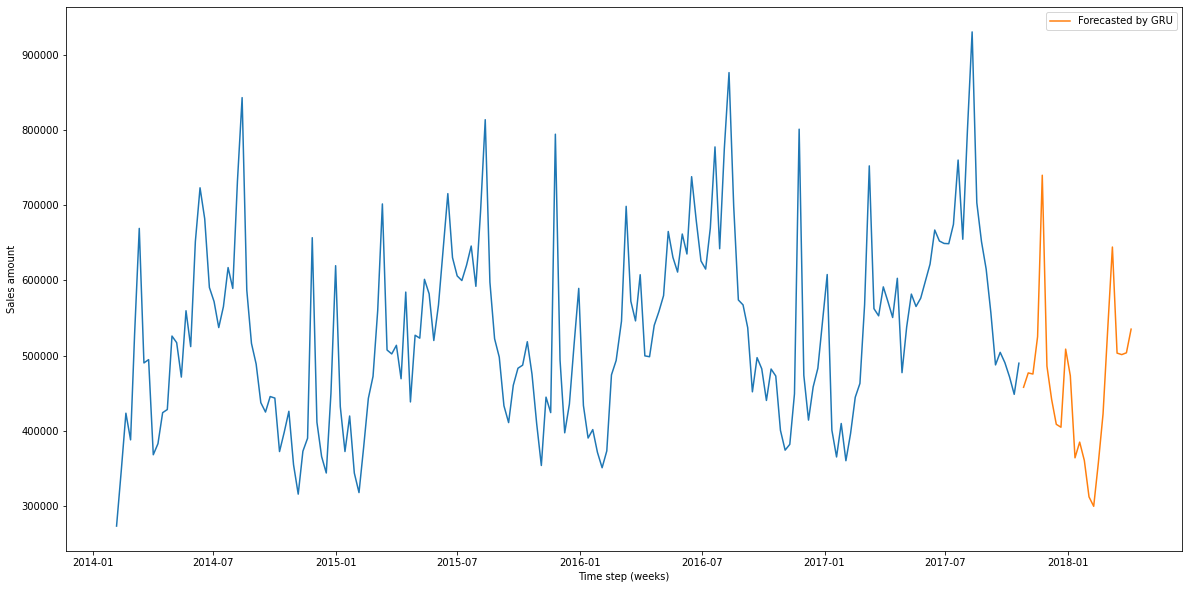

In [683]:
plt.figure(figsize=(20, 10)) 
plt.plot( label='Old_data')
plt.plot(sales_per_week.reset_index().Date.astype('datetime64[ns]'), old_data)
plt.plot(pd.date_range('10/26/2017', periods=24, freq='7D'), prediction, label='Forecasted by GRU')
      
plt.legend(loc='upper right')
plt.xlabel('Time step (weeks)')
plt.ylabel('Sales amount')

In case we need a new dataframe with all data for further analysis - we can transform data from numpy to pd.Dataframe

In [699]:
dates = pd.DataFrame(pd.date_range('10-26-2017', periods=24, freq='7D'), columns=["Date"])
sales = pd.DataFrame(prediction, columns=["Sales"])

predicted_values_df = pd.concat([dates, sales], axis=1)
predicted_values_df['Date'] = predicted_values_df['Date'].dt.date
updated_data = pd.concat([sales_per_week.reset_index(), predicted_values_df], ignore_index=True)

Now in predicted_values_df we have only new data, which we have predicted. And in updated_data we have the whole dataset + predicted data.

In [700]:
predicted_values_df

,Date,Sales
0,2017-10-26,457828.457344
1,2017-11-02,476925.730892
2,2017-11-09,475460.450046
3,2017-11-16,525248.687454
4,2017-11-23,740162.759088
5,2017-11-30,485967.762744
6,2017-12-07,441729.802668
7,2017-12-14,408503.483842
8,2017-12-21,404598.500581
9,2017-12-28,508634.295382


In [701]:
updated_data

,Date,Sales
0,2014-02-06,272996.200000
1,2014-02-13,346172.760000
2,2014-02-20,423308.320000
3,2014-02-27,387812.840000
4,2014-03-05,528118.230000
5,2014-03-12,669367.640000
6,2014-03-19,490228.600000
7,2014-03-26,494630.550000
8,2014-04-02,367991.150000
9,2014-04-09,382757.480000


## Thank you for reading!